In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob

In [54]:
az_folder = '/Users/mebowen/Desktop/sun_azimuth/'
el_folder = '/Users/mebowen/Desktop/sun_elevation/'

az_files = glob.glob(az_folder + "sun*")
az_files.sort()

el_files = glob.glob(el_folder + "sun*")
el_files.sort()


In [55]:
az_spectra = [] # Create an empty array to later hold each of the spectra from the azimuthal scans

for az_file in az_files: #Pull each individual filename from the list of azimuth files
    
    with open(az_file) as az_data: #This opens up the file and puts each line into a list called az_data
        
        spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(az_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
            
        az_spectra.append(tot_spectrum)
        

el_spectra = [] # Create an empty array to later hold each of the spectra from the azimuthal scans

for el_file in el_files: #Pull each individual filename from the list of azimuth files
    
    with open(el_file) as el_data: #This opens up the file and puts each line into a list called az_data
        
        spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(el_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
            
        el_spectra.append(tot_spectrum)
        


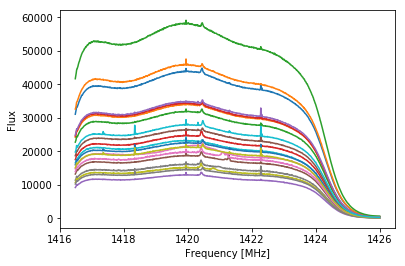

In [56]:
## plotting frequency vs. flux AZIMUTH

frequency = np.linspace(1416., 1426., 1024)

#print (az_spectra)

i=0
while (i<20):
    plt.plot(frequency[50:], az_spectra[i][50:])
    plt.ylabel("Flux")
    plt.xlabel("Frequency [MHz]")
    i+=1

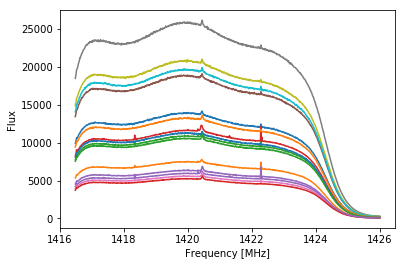

In [57]:
## plotting frequency vs. flux ELEVATION

frequency = np.linspace(1416., 1426., 1024)


i=0
while (i<15):
    plt.plot(frequency[50:], el_spectra[i][50:])
    plt.ylabel("Flux")
    plt.xlabel("Frequency [MHz]")
    i+=1

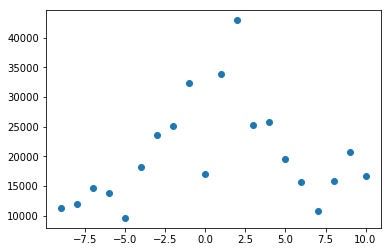

In [63]:
avg_az_flux = []
az_offset = [-1, -2, -3, -4, -5, -6, -7, -8, -9, 0, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9]


for spectrum in az_spectra:
    avg_az_flux.append(np.mean(spectrum[50:]))
  
    
plt.scatter(az_offset, avg_az_flux)

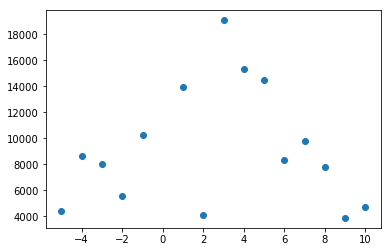

In [68]:
avg_el_flux = []
el_offset = [-1, -2, -3, -4, -5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


for spectrum in el_spectra:
    avg_el_flux.append(np.mean(spectrum[50:]))

                       
plt.scatter(el_offset, avg_el_flux)

A=182081.645967, center=1.24582947068, sigma=6.38866994157


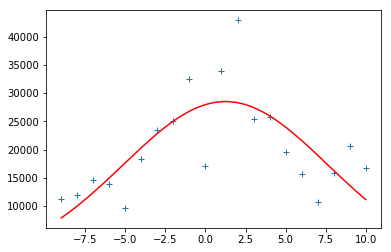

12.5250914723


In [90]:
real_az_offset = np.linspace(-9,10,5000)

A = 10000
center = 0
sigma = 5
x = np.linspace(-9,10,20)


def Gaussian(x, A, center, sigma):
    return A*(1/sigma)*np.exp(-(x-center)**2/(2*sigma**2))

coeffs, fiterr = curve_fit(Gaussian, az_offset, avg_az_flux, p0=(A,center,sigma))

print ("A=%s, center=%s, sigma=%s" % (coeffs[0], coeffs[1], coeffs[2]))
plt.plot(az_offset,avg_az_flux, '+')
plt.plot(real_az_offset, Gaussian(real_az_offset, *coeffs), 'r')
plt.show()


## full width half max
fwhm_az = 2*np.sqrt(2)*np.log(2)*coeffs[2]
print (fwhm_az)

A=67116.5170683, center=2.70029321351, sigma=5.03156575964


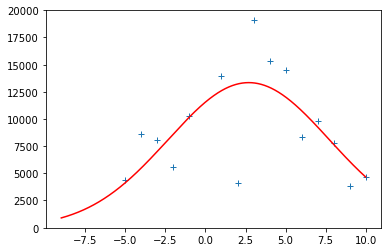

9.86446662056


In [92]:
real_el_offset = np.linspace(-9,10,5000)


coeffs, fiterr = curve_fit(Gaussian, el_offset, avg_el_flux, p0=(A,center,sigma))

print ("A=%s, center=%s, sigma=%s" % (coeffs[0], coeffs[1], coeffs[2]))
plt.plot(el_offset,avg_el_flux, '+')
plt.plot(real_el_offset, Gaussian(real_el_offset, *coeffs), 'r')
plt.show()


## full width half max
fwhm_el = 2*np.sqrt(2)*np.log(2)*coeffs[2]
print (fwhm_el)